In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463298 sha256=5236538d50ea7cfa595d80b869128c57d59486e36f997533a13f4ee4ba4c86fe
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
!pip install scikit-surprise==1.1.3 --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# === Library Data Handling ===
import pandas as pd
import numpy as np

# === Library Visualisasi ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Library Collaborative Filtering (Surprise) ===
from surprise.model_selection import train_test_split, cross_validate

# === Library Deep Learning (TensorFlow / Keras) ===
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# === Library Tambahan ===
import warnings
warnings.filterwarnings('ignore')

# Cek versi TensorFlow
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


In [ ]:
df = pd.read_csv('amazon.csv')

In [ ]:
print("=== INFO DATAFRAME ===")
print(df.info())

=== INFO DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-nu

In [ ]:
print("\n=== DESKRIPSI NUMERIK ===")
df.describe()


=== DESKRIPSI NUMERIK ===


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
print("\n=== HEAD (5 TERATAS) ===")
df.head()


=== HEAD (5 TERATAS) ===


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Kolom penting yang akan digunakan
important_columns = [
    'product_id', 'user_id', 'product_name', 'category', 'about_product',
    'discounted_price', 'rating', 'rating_count', 'review_content'
]

df = df[important_columns]
df.head()

,product_id,user_id,product_name,category,about_product,discounted_price,rating,rating_count,review_content
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be...",₹199,4.0,"43,994",I ordered this cable to connect my phone to An...
2,B096MSW6CT,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...,₹199,3.9,"7,928","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...,₹329,4.2,"94,363","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,₹154,4.2,"16,905","Bought this instead of original apple, does th..."


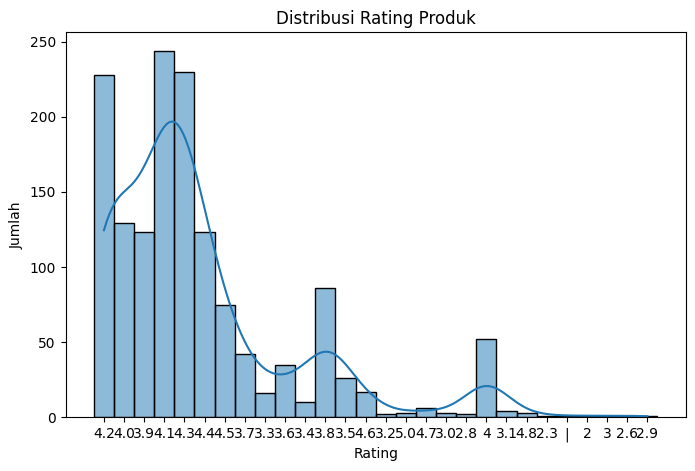

In [ ]:
# Import seaborn & matplotlib sudah di langkah sebelumnya

# Plot distribusi rating
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribusi Rating Produk')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

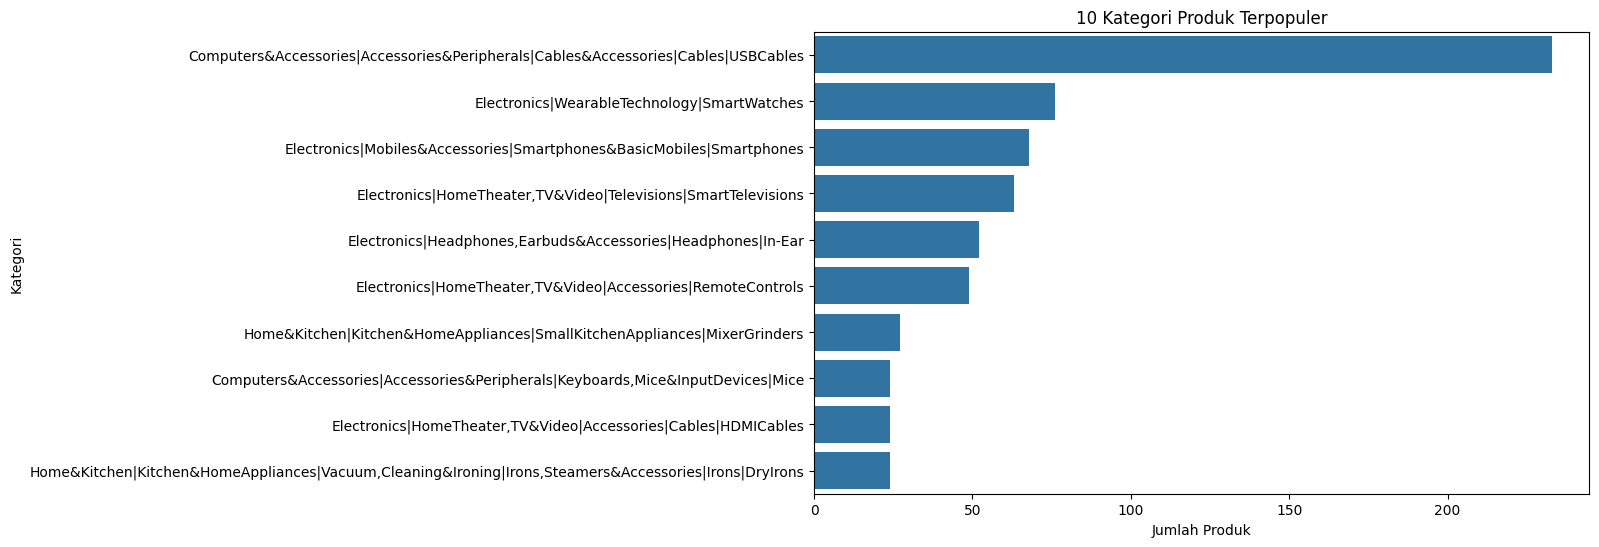

In [ ]:
# Cek 10 kategori terpopuler (jika ada kolom kategori)
if 'category' in df.columns:
    plt.figure(figsize=(10, 6))
    top_categories = df['category'].value_counts().head(10)
    sns.barplot(x=top_categories.values, y=top_categories.index)
    plt.title('10 Kategori Produk Terpopuler')
    plt.xlabel('Jumlah Produk')
    plt.ylabel('Kategori')
    plt.show()

In [ ]:
# Cek 10 produk dengan rating tertinggi
# Convert the 'rating' column to numeric, coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows where rating conversion failed (optional, depending on how you want to handle invalid ratings)
df.dropna(subset=['rating'], inplace=True)

top_rated = df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)
print("\n=== 10 PRODUK DENGAN RATA-RATA RATING TERTINGGI ===")
top_rated


=== 10 PRODUK DENGAN RATA-RATA RATING TERTINGGI ===


,rating
product_name,
"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",5.0
"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",5.0
"Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",5.0
"Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))",4.8
"Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)",4.8
"Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)",4.8
Spigen EZ Fit Tempered Glass Screen Protector for iPhone 14 Pro Max - 2 Pack (Sensor Protection),4.7
"Zuvexa USB Rechargeable Electric Foam Maker - Handheld Milk Wand Mixer Frother for Hot Milk, Hand Blender Coffee, Egg Beater (Black)",4.7
"FIGMENT Handheld Milk Frother Rechargeable, 3-Speed Electric Frother for Coffee with 2 Whisks and Coffee Decoration Tool, Coffee Frother Mixer, CRESCENT ENTERPRISES VRW0.50BK (A1)",4.7


In [ ]:
# 1️⃣ Handle missing values
print("=== CEK MISSING VALUES ===")
print(df.isnull().sum())

# Untuk tahap awal, kita drop baris yang missing di kolom penting
important_cols = ['user_id', 'product_id', 'rating']
df_clean = df.dropna(subset=important_cols)

print(f"\nJumlah baris setelah drop missing: {df_clean.shape[0]}")

# 2️⃣ Periksa duplikasi
print("\n=== CEK DUPLIKASI ===")
print(f"Jumlah duplikasi: {df_clean.duplicated().sum()}")

# Hapus duplikasi jika ada
df_clean = df_clean.drop_duplicates()
print(f"Jumlah baris setelah drop duplikasi: {df_clean.shape[0]}")

=== CEK MISSING VALUES ===
product_id          0
user_id             0
product_name        0
category            0
about_product       0
discounted_price    0
rating              0
rating_count        2
review_content      0
dtype: int64

Jumlah baris setelah drop missing: 1464

=== CEK DUPLIKASI ===
Jumlah duplikasi: 66
Jumlah baris setelah drop duplikasi: 1398


In [ ]:
# 3️⃣ Pecah user_id & review_id jika masih dalam bentuk list string
# Contoh: '["user1", "user2"]' → pisah jadi dua baris

import ast

def explode_column_list(df, col_name):
    """Fungsi untuk pecah kolom list string jadi baris terpisah"""
    df[col_name] = df[col_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [x])
    df_exploded = df.explode(col_name)
    return df_exploded

# Cek apakah user_id kolomnya berisi list string
sample_value = df_clean['user_id'].iloc[0]
if isinstance(sample_value, str) and sample_value.startswith('['):
    df_clean = explode_column_list(df_clean, 'user_id')

# Lakukan juga jika review_id atau rating kolomnya dalam bentuk list
if 'review_id' in df_clean.columns:
    sample_review = df_clean['review_id'].iloc[0]
    if isinstance(sample_review, str) and sample_review.startswith('['):
        df_clean = explode_column_list(df_clean, 'review_id')

if isinstance(df_clean['rating'].iloc[0], str) and df_clean['rating'].iloc[0].startswith('['):
    df_clean = explode_column_list(df_clean, 'rating')

# Pastikan hasil akhirnya adalah satu baris per user–produk–rating
print("\n=== DATA HASIL AKHIR ===")
df_clean[['user_id', 'product_id', 'rating']].head()


=== DATA HASIL AKHIR ===


,user_id,product_id,rating
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2


In [ ]:
# Hanya ambil kolom yang kita perlukan
df_small = df[['user_id', 'product_id', 'rating']]

# Buat list untuk tampung hasil pecahan
rows = []

# Iterasi tiap baris
for index, row in df_small.iterrows():
    user_list = str(row['user_id']).split(',')  # Pecah user_id berdasar koma
    product_id = row['product_id']
    rating = row['rating']

    # Untuk setiap user, buat satu baris baru
    for user in user_list:
        user = user.strip()  # Hapus spasi jika ada
        rows.append({
            'user_id': user,
            'product_id': product_id,
            'rating': rating
        })

# Buat dataframe baru dari hasil pecahan
df_expanded = pd.DataFrame(rows)

# Tampilkan hasil
print("Data setelah diekstrak:")
df_expanded.head(20)

Data setelah diekstrak:


,user_id,product_id,rating
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,4.2
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,B07JW9H4J1,4.2
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,B07JW9H4J1,4.2
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,B07JW9H4J1,4.2
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,B07JW9H4J1,4.2
5,AENGU523SXMOS7JPDTW52PNNVWGQ,B07JW9H4J1,4.2
6,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,B07JW9H4J1,4.2
7,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,B07JW9H4J1,4.2
8,AECPFYFQVRUWC3KGNLJIOREFP5LQ,B098NS6PVG,4.0
9,AGYYVPDD7YG7FYNBXNGXZJT525AQ,B098NS6PVG,4.0


In [ ]:
all_columns = df.columns.tolist()

# Buat list untuk tampung hasil pecahan
rows = []

# Iterasi tiap baris
for index, row in df.iterrows():
    user_list = str(row['user_id']).split(',')  # Pecah user_id berdasar koma

    # Untuk setiap user, buat satu baris baru dengan semua kolom lain ikut
    for user in user_list:
        user = user.strip()
        new_row = row.copy()
        new_row['user_id'] = user  # Replace jadi satu user saja
        rows.append(new_row)

# Buat dataframe baru dari hasil pecahan
df_expanded = pd.DataFrame(rows)

# Tampilkan hasil
print("Data setelah diekstrak:")
df_expanded.head(20)

Data setelah diekstrak:


,product_id,user_id,product_name,category,about_product,discounted_price,rating,rating_count,review_content
0,B07JW9H4J1,AG3D6O4STAQKAY2UVGEUV46KN35Q,wayona nylon braided usb to lightning fast cha...,computers accessories accessories peripherals ...,high compatibility compatible with iphone 12 1...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
0,B07JW9H4J1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,wayona nylon braided usb to lightning fast cha...,computers accessories accessories peripherals ...,high compatibility compatible with iphone 12 1...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
0,B07JW9H4J1,AHCTC6ULH4XB6YHDY6PCH2R772LQ,wayona nylon braided usb to lightning fast cha...,computers accessories accessories peripherals ...,high compatibility compatible with iphone 12 1...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
0,B07JW9H4J1,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,wayona nylon braided usb to lightning fast cha...,computers accessories accessories peripherals ...,high compatibility compatible with iphone 12 1...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
0,B07JW9H4J1,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,wayona nylon braided usb to lightning fast cha...,computers accessories accessories peripherals ...,high compatibility compatible with iphone 12 1...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
0,B07JW9H4J1,AENGU523SXMOS7JPDTW52PNNVWGQ,wayona nylon braided usb to lightning fast cha...,computers accessories accessories peripherals ...,high compatibility compatible with iphone 12 1...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
0,B07JW9H4J1,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,wayona nylon braided usb to lightning fast cha...,computers accessories accessories peripherals ...,high compatibility compatible with iphone 12 1...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
0,B07JW9H4J1,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,wayona nylon braided usb to lightning fast cha...,computers accessories accessories peripherals ...,high compatibility compatible with iphone 12 1...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,AECPFYFQVRUWC3KGNLJIOREFP5LQ,ambrane unbreakable 60w 3a fast charging 1 5m ...,computers accessories accessories peripherals ...,compatible with all type c enabled devices be ...,₹199,4.0,"43,994",I ordered this cable to connect my phone to An...
1,B098NS6PVG,AGYYVPDD7YG7FYNBXNGXZJT525AQ,ambrane unbreakable 60w 3a fast charging 1 5m ...,computers accessories accessories peripherals ...,compatible with all type c enabled devices be ...,₹199,4.0,"43,994",I ordered this cable to connect my phone to An...


In [ ]:
# Hapus baris yang memiliki missing values di kolom penting
df.dropna(subset=['product_id', 'product_name', 'category', 'about_product'], inplace=True)

# Reset index agar rapi
df.reset_index(drop=True, inplace=True)

print("Jumlah data setelah cleaning:", len(df))

Jumlah data setelah cleaning: 1464


In [ ]:
# Fungsi bersihkan dan normalisasi teks
import re

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'<.*?>', ' ', text)  # hapus HTML tag
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)  # hapus simbol
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    return text

# Terapkan pada kolom teks
df['product_name'] = df['product_name'].apply(clean_text)
df['about_product'] = df['about_product'].apply(clean_text)
df['category'] = df['category'].apply(clean_text)

In [ ]:
# Misalnya hasil ekstraksi disimpan ke df_cleaned
df = df_expanded.copy()  # df_cleaned adalah hasil transform sebelumnya
print(df.head())

   product_id                       user_id  \
0  B07JW9H4J1  AG3D6O4STAQKAY2UVGEUV46KN35Q   
0  B07JW9H4J1  AHMY5CWJMMK5BJRBBSNLYT3ONILA   
0  B07JW9H4J1  AHCTC6ULH4XB6YHDY6PCH2R772LQ   
0  B07JW9H4J1  AGYHHIERNXKA6P5T7CZLXKVPT7IQ   
0  B07JW9H4J1  AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q   

                                        product_name  \
0  wayona nylon braided usb to lightning fast cha...   
0  wayona nylon braided usb to lightning fast cha...   
0  wayona nylon braided usb to lightning fast cha...   
0  wayona nylon braided usb to lightning fast cha...   
0  wayona nylon braided usb to lightning fast cha...   

                                            category  \
0  computers accessories accessories peripherals ...   
0  computers accessories accessories peripherals ...   
0  computers accessories accessories peripherals ...   
0  computers accessories accessories peripherals ...   
0  computers accessories accessories peripherals ...   

                                       abou

In [ ]:
# Cek missing values
print(df.isnull().sum())

# Jika ada: drop atau impute
df.dropna(inplace=True)

product_id          0
user_id             0
product_name        0
category            0
about_product       0
discounted_price    0
rating              0
rating_count        0
review_content      0
dtype: int64


In [ ]:
df.drop_duplicates(subset=['user_id', 'product_id'], inplace=True)

In [ ]:
# Buat label encoder
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

# Transform ke bentuk numerik
df['user_idx'] = user_encoder.fit_transform(df['user_id'])
df['product_idx'] = product_encoder.fit_transform(df['product_id'])

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df[['user_idx', 'product_idx']]
y = df['rating']

# Split ke train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Hitung jumlah user dan produk unik
num_users = df['user_idx'].nunique()
num_products = df['product_idx'].nunique()

print(f"Total unique users: {num_users}")
print(f"Total unique products: {num_products}")

Total unique users: 9040
Total unique products: 1348


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

embedding_size = 50  # ukuran latent space

In [ ]:
# Input layer
user_input = Input(shape=(1,))
product_input = Input(shape=(1,))

# Embedding layer
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1)(user_input)
product_embedding = Embedding(input_dim=num_products, output_dim=embedding_size, input_length=1)(product_input)

# Flatten
user_vec = Flatten()(user_embedding)
product_vec = Flatten()(product_embedding)

# Dot product untuk menghitung interaksi user-item
dot_product = Dot(axes=1)([user_vec, product_vec])

# Tambahkan Dense (opsional, kalau mau lebih kompleks)
# dense = Dense(64, activation='relu')(dot_product)
# output = Dense(1)(dense)

# Output rating langsung dari dot product
output = dot_product

In [ ]:
model = Model(inputs=[user_input, product_input], outputs=output)

# Compile dengan Adam + MSE + RMSE
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=MeanSquaredError(),
    metrics=[RootMeanSquaredError()]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 50)     │    452,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 50)     │     67,400 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 519,400 (1.98 MB)

 Trainable params: 519,400 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Pastikan array terpisah
user_train = X_train['user_idx'].values
product_train = X_train['product_idx'].values
rating_train = y_train.values

user_test = X_test['user_idx'].values
product_test = X_test['product_idx'].values
rating_test = y_test.values

In [ ]:
history = model.fit(
    x=[user_train, product_train],
    y=rating_train,
    epochs=10,  # bisa dinaikkan nanti
    batch_size=64,
    validation_data=([user_test, product_test], rating_test)
)

Epoch 1/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 16.8187 - root_mean_squared_error: 4.1011 - val_loss: 16.8445 - val_root_mean_squared_error: 4.1042
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 16.7250 - root_mean_squared_error: 4.0896 - val_loss: 16.8202 - val_root_mean_squared_error: 4.1012
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 16.4140 - root_mean_squared_error: 4.0514 - val_loss: 16.7393 - val_root_mean_squared_error: 4.0914
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 15.8425 - root_mean_squared_error: 3.9803 - val_loss: 16.5701 - val_root_mean_squared_error: 4.0706
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.8458 - root_mean_squared_error: 3.8530 - val_loss: 16.3034 - val_root_mean_squared_error: 4.0377
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13.3413 - root_mean_squared_error: 3.6525 - val_loss: 15.9604 - val_root_mean_squared_error: 3.9950
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate RMSE di test set
test_loss, test_rmse = model.evaluate([user_test, product_test], rating_test)
print(f"Test RMSE: {test_rmse:.4f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.5612 - root_mean_squared_error: 3.8159
Test RMSE: 3.8276


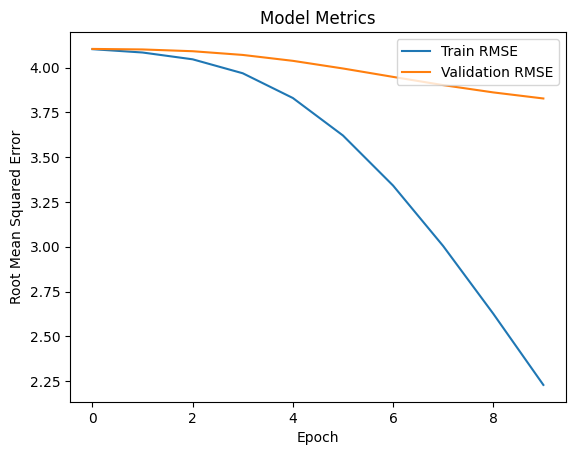

In [ ]:
import matplotlib.pyplot as plt

# Plot RMSE dari training & validation
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import numpy as np
import pandas as pd

def best_recommendations(df, model, user_encoder, product_encoder, top_n=10):

    # Mapping dictionaries
    product_to_idx = dict(zip(product_encoder.classes_, product_encoder.transform(product_encoder.classes_)))
    idx_to_product = dict(zip(product_encoder.transform(product_encoder.classes_), product_encoder.classes_))
    user_to_idx = dict(zip(user_encoder.classes_, user_encoder.transform(user_encoder.classes_)))

    # Pick a random user
    user_id = df['user_id'].sample(1).iloc[0]

    # Products the user has watched/reviewed
    watched = df[df['user_id'] == user_id]

    # Products the user has NOT watched
    all_products = set(df['product_id'].unique())
    watched_products = set(watched['product_id'].values)
    not_watched_products = list(all_products - watched_products)
    not_watched_products = list(set(not_watched_products).intersection(product_to_idx.keys()))

    # Prepare input arrays
    not_watched_encoded = np.array([product_to_idx[x] for x in not_watched_products])
    user_encoded = np.full_like(not_watched_encoded, user_to_idx[user_id])

    # Predict ratings
    ratings = model.predict([user_encoded, not_watched_encoded]).flatten()

    # Get top-N recommendations (no duplicates)
    top_indices = ratings.argsort()[-top_n:][::-1]
    recommended_product_ids = [idx_to_product[not_watched_encoded[i]] for i in top_indices]

    # Build clean recommendation DataFrame
    recommendations_df = (
        df[df['product_id'].isin(recommended_product_ids)]
        .drop_duplicates(subset='product_id')
        [['product_id', 'product_name', 'category']]
    )

    # Build top watched products DataFrame
    top_watched_df = (
        watched.sort_values(by='rating', ascending=False)
        .drop_duplicates(subset='product_id')
        [['product_id', 'product_name', 'category', 'rating']]
        .head(5)
    )

    return {
        'user_id': user_id,
        'top_watched': top_watched_df,
        'top_recommendations': recommendations_df
    }

In [ ]:
# ==================== USAGE EXAMPLE ====================

result = best_recommendations(df, model, user_encoder, product_encoder, top_n=10)

print(f"Showing recommendations for user: {result['user_id']}")
print('===' * 10)

print('Top products watched by user:')
print(result['top_watched'].to_string(index=False))
print('----' * 10)

print('Top 10 product recommendations:')
result['top_recommendations']

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Showing recommendations for user: AHG33QRWJPAIDBY3URAHOVO67T5A
Top products watched by user:
product_id                                                                                              product_name                                    category  rating
B09MT84WV5 samsung evo plus 128gb microsdxc uhs i u3 130mb s full hd 4k uhd memory card with adapter mb mc128ka blue electronics accessories memorycards microsd     4.3
B09MT6XSFW   samsung evo plus 64gb microsdxc uhs i u1 130mb s full hd 4k uhd memory card with adapter mb mc64ka blue electronics accessories memorycards microsd     4.3
----------------------------------------
Top 10 product recommendations:


,product_id,product_name,category
67,B0B9XN9S3W,acer 80 cm 32 inches n series hd ready tv ar32...,electronics hometheater tv video televisions s...
243,B09L835C3V,smashtronics case for firetv remote fire stick...,electronics hometheater tv video accessories r...
296,B09HK9JH4F,smashtronics case for firetv remote fire stick...,electronics hometheater tv video accessories r...
810,B07G3YNLJB,crucial bx500 240gb 3d nand sata 6 35 cm 2 5 i...,computers accessories components internalsolid...
998,B00EYW1U68,tp link tl wa855re 300 mbps wi fi range extend...,computers accessories networkingdevices repeat...
1151,B09ZK6THRR,croma 1100 w dry iron with weilburger dual sol...,home kitchen kitchen homeappliances vacuum cle...
1310,B081B1JL35,csi international instant water geyser water h...,home kitchen heating cooling airquality waterh...
1331,B0B9RZ4G4W,amazon basics 300 w hand blender with stainles...,home kitchen kitchen homeappliances smallkitch...
1345,B09Y358DZQ,pigeon zest mixer grinder 3 speed control 750 ...,home kitchen kitchen homeappliances smallkitch...
1415,B0BJ6P3LSK,aqua d pure active copper 12 l ro uv water fil...,home kitchen kitchen homeappliances waterpurif...
